def UsersRecommend( año : int ): Devuelve el top 3 de juegos MENOS recomendados por usuarios para el año dado. (reviews.recommend = True y comentarios positivos/neutrales)

In [1]:
import pandas as pd

archivo_csv1 = 'gamescompleto.csv'
archivo_csv2 = 'itemscompleto.csv'
archivo_csv3 = 'df_reviews_completo3sin23.csv'

dfgames = pd.read_csv(archivo_csv1)
dfitems = pd.read_csv(archivo_csv2)
dfreviews = pd.read_csv(archivo_csv3)

In [2]:
dfreviews.head()

,user_id,user_url,funny,Fecha_posteo,last_edited,item_id,helpful,recommend,sentiment_analysis
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,NaN,2011.0,NaN,1250,No ratings yet,True,2
1,js41637,http://steamcommunity.com/id/js41637,NaN,2011.0,NaN,22200,No ratings yet,True,2
2,evcentric,http://steamcommunity.com/id/evcentric,NaN,2011.0,NaN,43110,No ratings yet,True,1
3,doctr,http://steamcommunity.com/id/doctr,NaN,2014.0,NaN,251610,15 of 20 people (75%) found this review helpful,True,2
4,maplemage,http://steamcommunity.com/id/maplemage,NaN,2013.0,NaN,227300,0 of 1 people (0%) found this review helpful,True,1


In [3]:
dfreviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59275 entries, 0 to 59274
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             25787 non-null  object 
 1   user_url            25787 non-null  object 
 2   funny               8150 non-null   object 
 3   Fecha_posteo        49159 non-null  float64
 4   last_edited         6140 non-null   object 
 5   item_id             59275 non-null  int64  
 6   helpful             59275 non-null  object 
 7   recommend           59275 non-null  bool   
 8   sentiment_analysis  59275 non-null  int64  
dtypes: bool(1), float64(1), int64(2), object(5)
memory usage: 3.7+ MB


In [4]:
dfreviews.isnull().sum()

user_id               33488
user_url              33488
funny                 51125
Fecha_posteo          10116
last_edited           53135
item_id                   0
helpful                   0
recommend                 0
sentiment_analysis        0
dtype: int64

In [5]:
dfreviews2 = dfreviews.dropna(subset=['Fecha_posteo'])

print(dfreviews2.isnull().sum())


user_id               28803
user_url              28803
funny                 43373
Fecha_posteo              0
last_edited           44022
item_id                   0
helpful                   0
recommend                 0
sentiment_analysis        0
dtype: int64


In [6]:
# de este df necesitariamos solo estas columnas 'item_id','Fecha_posteo','recommend', sentiment_analysis
dfreviews3= dfreviews2[['item_id','Fecha_posteo','recommend','sentiment_analysis']]

In [7]:
dfreviews3.head()

,item_id,Fecha_posteo,recommend,sentiment_analysis
0,1250,2011.0,True,2
1,22200,2011.0,True,2
2,43110,2011.0,True,1
3,251610,2014.0,True,2
4,227300,2013.0,True,1


In [8]:
dfitems.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88310 entries, 0 to 88309
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           88310 non-null  object 
 1   items_count       88310 non-null  float64
 2   steam_id          88310 non-null  int64  
 3   user_url          88310 non-null  object 
 4   item_id           88310 non-null  int64  
 5   item_name         88310 non-null  object 
 6   playtime_forever  88310 non-null  int64  
 7   playtime_2weeks   88310 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 5.4+ MB


In [9]:
dfitems2= dfitems[['item_name','item_id']]

In [10]:
dfitems2.head()

,item_name,item_id
0,Counter-Strike,10
1,Team Fortress Classic,20
2,Day of Defeat,30
3,Deathmatch Classic,40
4,Half-Life: Opposing Force,50


In [11]:
dfitems2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88310 entries, 0 to 88309
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   item_name  88310 non-null  object
 1   item_id    88310 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


In [12]:
# unimos nuestros df por medio de item_id
merged_df = pd.merge(dfreviews3, dfitems2, on='item_id', how='inner')


In [13]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9535143 entries, 0 to 9535142
Data columns (total 5 columns):
 #   Column              Dtype  
---  ------              -----  
 0   item_id             int64  
 1   Fecha_posteo        float64
 2   recommend           bool   
 3   sentiment_analysis  int64  
 4   item_name           object 
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 300.1+ MB


In [14]:
merged_df.head()

,item_id,Fecha_posteo,recommend,sentiment_analysis,item_name
0,1250,2011.0,True,2,Killing Floor
1,1250,2011.0,True,2,Killing Floor
2,1250,2011.0,True,2,Killing Floor
3,1250,2011.0,True,2,Killing Floor
4,1250,2011.0,True,2,Killing Floor


In [15]:
# para achicar el df aca nos quedamos solo con el valor 0 y los False
merged_df = merged_df[merged_df['sentiment_analysis'] == 0]

In [16]:
merged_df = merged_df[merged_df['recommend'] == False]

In [17]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 301684 entries, 6641 to 9535125
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   item_id             301684 non-null  int64  
 1   Fecha_posteo        301684 non-null  float64
 2   recommend           301684 non-null  bool   
 3   sentiment_analysis  301684 non-null  int64  
 4   item_name           301684 non-null  object 
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 11.8+ MB


In [18]:
merged_df.isnull().sum()

item_id               0
Fecha_posteo          0
recommend             0
sentiment_analysis    0
item_name             0
dtype: int64

In [19]:
# veamos lo rangos de fecha para solicitar el imput
valor_minimo = merged_df['Fecha_posteo'].min()
valor_maximo = merged_df['Fecha_posteo'].max()

print("Valor Mínimo:", valor_minimo)
print("Valor Máximo:", valor_maximo)


Valor Mínimo: 2011.0
Valor Máximo: 2015.0


In [21]:
merged_df['Fecha_posteo'] = merged_df['Fecha_posteo'].astype(int)


In [22]:
merged_df


,item_id,Fecha_posteo,recommend,sentiment_analysis,item_name
6641,1250,2014,False,0,Killing Floor
6642,1250,2014,False,0,Killing Floor
6643,1250,2014,False,0,Killing Floor
6644,1250,2014,False,0,Killing Floor
6645,1250,2014,False,0,Killing Floor
...,...,...,...,...,...
9535107,209630,2014,False,0,Magrunner: Dark Pulse
9535108,209630,2014,False,0,Magrunner: Dark Pulse
9535123,305920,2015,False,0,Another Perspective
9535124,305920,2015,False,0,Another Perspective


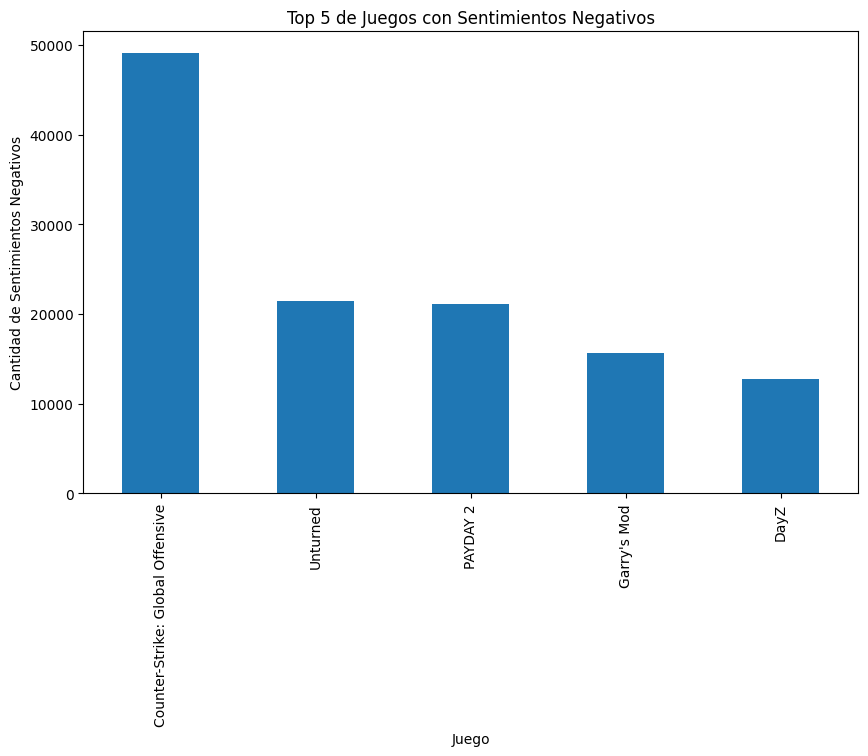

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

sentimientos_negativos = merged_df[merged_df['sentiment_analysis'] == 0]

# Cuenta cuántas veces aparece cada juego
top_juegos_negativos = sentimientos_negativos['item_name'].value_counts().head(5)

# Grafica el top 5 de juegos con sentimientos negativos
top_juegos_negativos.plot(kind='bar', figsize=(10, 6))
plt.title('Top 5 de Juegos con Sentimientos Negativos')
plt.xlabel('Juego')
plt.ylabel('Cantidad de Sentimientos Negativos')
plt.show()



In [26]:
# Vamos a reducirlo a la mitad por una cuestion de espacio en render 
df_reducido = merged_df.sample(frac=0.5, random_state=1)

In [28]:
df_reducido.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150842 entries, 8533128 to 3708605
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   item_id             150842 non-null  int64 
 1   Fecha_posteo        150842 non-null  int32 
 2   recommend           150842 non-null  bool  
 3   sentiment_analysis  150842 non-null  int64 
 4   item_name           150842 non-null  object
dtypes: bool(1), int32(1), int64(2), object(1)
memory usage: 5.3+ MB


In [27]:
archivo = 'df_4reducido.parquet'
# exportamos el df a un archivo Parquet.
df_reducido.to_parquet(archivo, index=False)

In [29]:
archivo = 'df_4reducido.parquet'
# vargamos el archivo 
df = pd.read_parquet(archivo)

In [30]:
def UsersNotRecommend(year:int):
    # Filtra el DataFrame para el año especificado y donde 'recommend' es True
    juegos_recomendados = df[(df['Fecha_posteo'] == year) & (df['recommend'] == False)]

    # Verifica si no hay datos para ese año
    if juegos_recomendados.empty:
        return ("No hay datos para ese año", year)

    # Agrupa por el nombre del juego y cuenta las recomendaciones
    juegos_agrupados = juegos_recomendados['item_name'].value_counts().reset_index()
    juegos_agrupados.columns = ['Juego', 'Recomendaciones']

    # Ordena los juegos por número de recomendaciones de mayor a menor
    juegos_ordenados = juegos_agrupados.sort_values(by='Recomendaciones', ascending=False)

    # Toma los 3 juegos con más recomendaciones
    top_3_juegos = juegos_ordenados.head(3)

    # Formatea los resultados en la estructura deseada
    resultado = []
    for i, row in top_3_juegos.iterrows():
        resultado.append({"Puesto " + str(i + 1): row['Juego']})

    return resultado


In [33]:
top_3_juegos = UsersNotRecommend(2011)
print(top_3_juegos)


[{'Puesto 1': 'War Inc. Battlezone'}, {'Puesto 2': 'From Dust'}, {'Puesto 3': 'And Yet It Moves'}]


In [34]:
# Lista para almacenar los resultados por año
resultados_por_año = []

# Itera desde el año 2010 hasta el 2015
for año in range(2010, 2023):
    # Llama a la función UsersRecommend para el año actual
    top_3_juegos_año = UsersNotRecommend(año)

    # Agrega el resultado a la lista de resultados por año
    resultados_por_año.append({str(año): top_3_juegos_año})

# Imprime los resultados
for resultado in resultados_por_año:
    print(resultado)


{'2010': ('No hay datos para ese año', 2010)}
{'2011': [{'Puesto 1': 'War Inc. Battlezone'}, {'Puesto 2': 'From Dust'}, {'Puesto 3': 'And Yet It Moves'}]}
{'2012': [{'Puesto 1': 'Red Faction: Armageddon'}, {'Puesto 2': "The Kings' Crusade"}, {'Puesto 3': 'Resident Evil™: Operation Raccoon City'}]}
{'2013': [{'Puesto 1': "Garry's Mod"}, {'Puesto 2': 'No More Room in Hell'}, {'Puesto 3': 'PlanetSide 2'}]}
{'2014': [{'Puesto 1': 'Counter-Strike: Global Offensive'}, {'Puesto 2': 'Unturned'}, {'Puesto 3': "Garry's Mod"}]}
{'2015': [{'Puesto 1': 'Counter-Strike: Global Offensive'}, {'Puesto 2': 'PAYDAY 2'}, {'Puesto 3': 'Unturned'}]}
{'2016': ('No hay datos para ese año', 2016)}
{'2017': ('No hay datos para ese año', 2017)}
{'2018': ('No hay datos para ese año', 2018)}
{'2019': ('No hay datos para ese año', 2019)}
{'2020': ('No hay datos para ese año', 2020)}
{'2021': ('No hay datos para ese año', 2021)}
{'2022': ('No hay datos para ese año', 2022)}
